# Image Recognizer -> CNN

In [1]:
!pip install wget # Install the wget package for file download

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=fcea8e3f89d3d00e39b7ea817eabdb01849bfb9bc571c494c0899a0d6b9a842e
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:

import cv2
import numpy as np
import requests
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import datetime
from tensorflow import keras
from tensorflow.keras.models import Model
import tensorflow as tf
import zipfile
import pathlib
import os
import wget
import random
import shutil
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
# Download the Bike zip file
bike_zip_path = tf.keras.utils.get_file(
    "Bike.zip",
    "https://github.com/Rhodham96/LGG-Thomas5/raw/main/PersonalProjects/CNN/Bike.zip", # Use 'raw' instead of 'blob' for direct download
    extract=False
)

# Extract the Bike zip file
with zipfile.ZipFile(bike_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/Train')

bike_data_dir = pathlib.Path('/content/datasets/Train/Bike')
print(bike_data_dir)
print(os.path.abspath(bike_data_dir))

98924686/98924686 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
/content/datasets/Train/Bike
/content/datasets/Train/Bike


In [4]:
# Download the Car zip file
car_zip_path = '/content/datasets/Car.zip'
url = "https://github.com/Rhodham96/LGG-Thomas5/raw/main/PersonalProjects/CNN/Car.zip"
wget.download(url, car_zip_path) # Download and save to desired location

# Extract the Car zip file
import zipfile # Import zipfile for file extraction
with zipfile.ZipFile(car_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/Train')

car_data_dir = pathlib.Path('/content/datasets/Train/Car')
print(car_data_dir)
print(os.path.abspath(car_data_dir))

/content/datasets/Train/Car
/content/datasets/Train/Car


In [5]:
data_dir = pathlib.Path("/content/datasets/Train")
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

4210


In [6]:
import random
# Define the source and target directories
source_dir = '/content/datasets/Train/Bike'
target_dir = '/content/datasets/Val/Bike'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 435)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

# Define the source and target directories
source_dir = '/content/datasets/Train/Car'
target_dir = '/content/datasets/Val/Car'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 435)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

CarVal = '/content/datasets/dataset/CarVal'
BikeVal = '/content/datasets/dataset/BikeVal'

Moved 435 files from /content/datasets/Train/Bike to /content/datasets/Val/Bike
Moved 435 files from /content/datasets/Train/Car to /content/datasets/Val/Car


In [7]:
import random
# Define the source and target directories
source_dir = '/content/datasets/Train/Bike'
target_dir = '/content/datasets/Test/Bike'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 10)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

# Define the source and target directories
source_dir = '/content/datasets/Train/Car'
target_dir = '/content/datasets/Test/Car'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Get all files in the source directory
all_files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

# Randomly select 400 files from the list
selected_files = random.sample(all_files, 10)

# Move the selected files to the target directory
for file in selected_files:
    src_file = os.path.join(source_dir, file)
    tgt_file = os.path.join(target_dir, file)

    # Move the file
    shutil.move(src_file, tgt_file)

print(f"Moved {len(selected_files)} files from {source_dir} to {target_dir}")

Test = '/content/datasets/dataset/Test'

Moved 10 files from /content/datasets/Train/Bike to /content/datasets/Test/Bike
Moved 10 files from /content/datasets/Train/Car to /content/datasets/Test/Car


In [8]:
Train_dir = pathlib.Path("/content/datasets/Train")
BikeTrain_dir = pathlib.Path("/content/datasets/Train/Bike")
CarTrain_dir = pathlib.Path("/content/datasets/Train/Car")

Val_dir = pathlib.Path("/content/datasets/Val")
BikeVal_dir = pathlib.Path("/content/datasets/Val/Bike")
CarVal_dir = pathlib.Path("/content/datasets/Val/Car")

Test_dir = pathlib.Path("/content/datasets/Test")
BikeTest_dir = pathlib.Path("/content/datasets/Test/Bike")
CarTest_dir = pathlib.Path("/content/datasets/Test/Car")

In [9]:
def remove_macosx(root_dir):
    """
    Removes all directories named '__MACOSX' and their contents
    within the specified root directory.
    """
    for root, dirs, files in os.walk(root_dir):
        for dir_name in dirs:
            if dir_name == '__MACOSX':
                dir_path = os.path.join(root, dir_name)
                print(f"Removing: {dir_path}")
                shutil.rmtree(dir_path)

# Call the function to remove '__MACOSX' directories within 'content'
content_dir = '/content' # Replace with the actual path to your 'content' directory
remove_macosx(content_dir)

Removing: /content/datasets/Train/__MACOSX


In [10]:
import os
import imghdr
import shutil  # Import shutil for file operations

def find_unsupported_images(directory):
    unsupported_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                image_type = imghdr.what(file_path)
                if image_type not in ['jpeg', 'png', 'gif', 'bmp']:
                    unsupported_files.append(file_path)
            except Exception:  # Handle potential errors during image type detection
                unsupported_files.append(file_path)
    return unsupported_files

def remove_unsupported_images(unsupported_files):
    for file_path in unsupported_files:
        print(f"Removing unsupported file: {file_path}")
        os.remove(file_path)  # Remove the unsupported file

# ... (Your existing code for loading data) ...

# Find and remove unsupported images before creating the datasets
unsupported_train_images = find_unsupported_images(Train_dir)
unsupported_val_images = find_unsupported_images(Val_dir)

remove_unsupported_images(unsupported_train_images)
remove_unsupported_images(unsupported_val_images)

print("Unsupported images in training directory:", unsupported_train_images)
print("Unsupported images in validation directory:", unsupported_val_images)

Removing unsupported file: /content/datasets/Train/Car/2025-EQS450-SEDAN-AVP-DR.webp
Removing unsupported file: /content/datasets/Train/Car/SUVs-2.webp
Removing unsupported file: /content/datasets/Train/Car/Best-5-Electric-Cars-in-UAE.webp
Removing unsupported file: /content/datasets/Train/Car/FAMILY-BANNER.webp
Removing unsupported file: /content/datasets/Train/Car/2024-AMG-GT55-COUPE-AVP-DR.webp
Removing unsupported file: /content/datasets/Train/Car/i20_Executive_Thumbnail_png_1719910104New_webp_1720006912.webp
Removing unsupported file: /content/datasets/Train/Car/website-final.svg
Removing unsupported file: /content/datasets/Train/Car/mspin_googcolor_medium.svg
Removing unsupported file: /content/datasets/Train/Car/Car (2).jpg
Removing unsupported file: /content/datasets/Train/Car/680.webp
Removing unsupported file: /content/datasets/Train/Bike/close-up-of-a-motorbike-508x348.jpg
Removing unsupported file: /content/datasets/Train/Bike/125cc-150cc-Haojue-Bike-Motorcycles-Motorbike-E

<ipython-input-10-697a6989958d>:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [11]:
img_height = 200  # Set your desired image height
img_width = 200  # Set your desired image width
batch_size = 32  # Set your desired batch size

# Load the training dataset, specifying supported image types
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    Train_dir,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    labels='inferred',
    label_mode='categorical',
    interpolation='nearest',
    shuffle=True
)


# Load the validation dataset, specifying supported image types
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    Val_dir,
    seed=42,
    labels='inferred',
    label_mode='categorical',  # Change to 'categorical' to match train_data
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    Test_dir,
    seed=42,
    labels='inferred',
    label_mode='categorical',  # Change to 'categorical' to match train_data
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

Found 3298 files belonging to 2 classes.
Found 865 files belonging to 2 classes.
Found 20 files belonging to 2 classes.


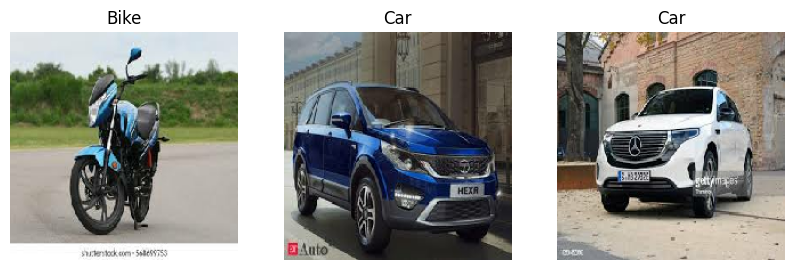

In [12]:
plt.figure(figsize=(10, 10))
class_names = train_data.class_names
for images, labels in train_data.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    # Get the index of the predicted class
    predicted_class_index = np.argmax(labels[i].numpy())

    plt.title(class_names[predicted_class_index]) # Index with the integer
    plt.axis("off")

In [13]:

from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(128,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,4, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),  # Use CategoricalCrossentropy
    metrics=['accuracy'])

logdir = "logs"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

model.fit(
  train_data,
  validation_data=val_data,
  epochs=10,
  callbacks=[tensorboard_callback]
)

model.summary()


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 32s 169ms/step - accuracy: 0.5945 - loss: 0.6275 - val_accuracy: 0.7191 - val_loss: 0.6021
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.8703 - loss: 0.3033 - val_accuracy: 0.9064 - val_loss: 0.2218
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 124ms/step - accuracy: 0.9282 - loss: 0.1897 - val_accuracy: 0.9272 - val_loss: 0.1730
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - accuracy: 0.9385 - loss: 0.1610 - val_accuracy: 0.9064 - val_loss: 0.2392
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 128ms/step - accuracy: 0.8908 - loss: 0.2631 - val_accuracy: 0.9387 - val_loss: 0.1772
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.9607 - loss: 0.1023 - val_accuracy: 0.9098 - val_loss: 0.2410
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - accuracy: 0.9588 - loss: 0.1084 - val_accuracy: 0.9306 - val_loss: 0.2020
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 13s 118ms/step - accuracy: 0.9803 - loss: 0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 197, 197, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 98, 98, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 95, 95, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 47, 47, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 44, 44, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1296)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          83,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 784,664 (2.99 MB)

 Trainable params: 261,554 (1021.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 523,110 (2.00 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step


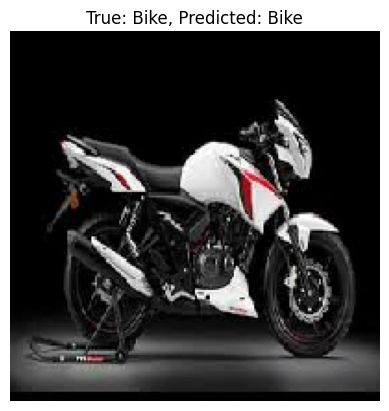

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


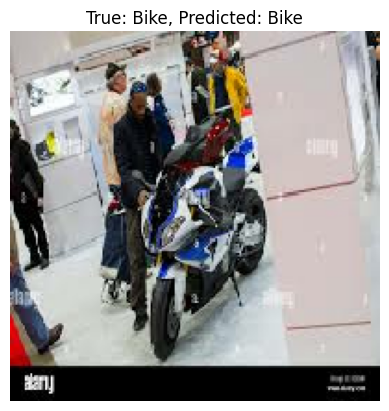

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


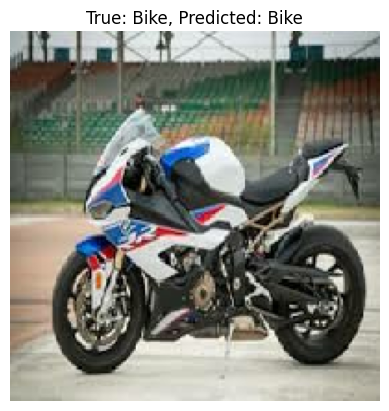

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


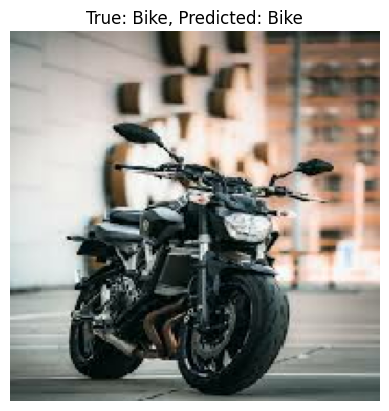

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


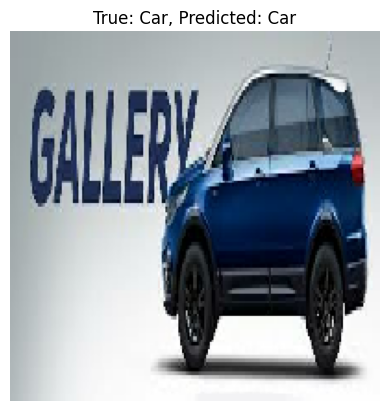

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Get a batch of test data
for images, labels in test_data.take(1):
  random_indices = random.sample(range(len(images)), 5)
  for i in random_indices:  # Test with 5 images
    # Get the image and its true label
    image = images[i].numpy().astype("uint8")
    true_label = np.argmax(labels[i].numpy())

    # Make a prediction
    prediction = model.predict(tf.expand_dims(images[i], 0))
    predicted_label = np.argmax(prediction[0])

    # Display the image and prediction
    plt.figure()
    plt.imshow(image)
    plt.title(f"True: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()


In [23]:
def display_image_filtered(name_image,model,layer_name,image):
    inp= model.inputs
    out1= model.get_layer(layer_name).output
    feature_map_1= Model(inputs= inp, outputs= out1)
    img=cv2.resize(image,(200,200))
    input_img= np.expand_dims(img, axis=0)
    f=feature_map_1.predict(input_img)
    dim = f.shape[3]
    print(f'{layer_name} | Features Shape: {f.shape}')
    print(f'Dimension {dim}')

    # Calculate grid dimensions based on 'dim' to ensure enough subplots
    grid_size = int(np.ceil(np.sqrt(dim))) # Ensures a square grid large enough

    fig= plt.figure(figsize=(30,30))
    if not os.path.exists(f'results_{name_image}'):
        os.makedirs(f'results_{name_image}')
    for i in range(dim):
        # Use calculated grid dimensions
        ax = fig.add_subplot(grid_size, grid_size, i+1)
        ax.axis('off')
        ax.imshow(f[0,:,:,i])
        plt.imsave(f'results_{name_image}/{name_image}_{layer_name}_{i}.jpg',f[0,:,:,i])


num = 0
for name in ['Car','Bike']:
    if name == 'Bike':
        image_path = "/content/datasets/Test/Bike/Bike (1055).jpeg" # Assign path to image_path
    elif name == 'Car':
        image_path = "/content/datasets/Test/Car/Car (112).jpeg" # Assign path to image_path

    # Read the image using cv2.imread
    image = cv2.imread(image_path)

    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # Now 'image' is a NumPy array
    plt.show()
    for i in range(0,4):
        if num == 0 and i==0:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d',image)
            print('-----------------------------------------------------')
        else:
            print('-----------------------------------------------------')
            print(f'{i+1}st convolutionnal layer')
            display_image_filtered(name,model,f'conv2d_{num+i}',image)
            print('--------')
            print(f'{i+1}nd Pooling')
            display_image_filtered(name,model,f'max_pooling2d_{num+i}',image)
            print('-----------------------------------------------------')

Output hidden; open in https://colab.research.google.com to view.

conv2d | Filter Shape: (4, 4, 3, 128) Bias Shape: (128,)
Dimension 128
(4, 4, 3, 128)


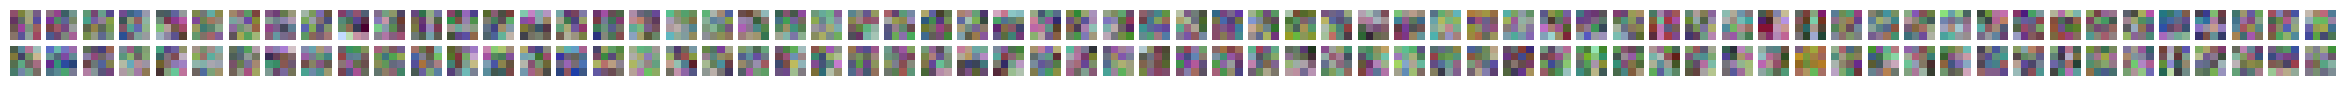

In [26]:
def display_filter(model, layer_name):
    layer = model.get_layer(layer_name)
    filter, bias= layer.get_weights()
    dim = filter.shape[3]
    print(f'{layer_name} | Filter Shape: {filter.shape} Bias Shape: {bias.shape}')
    print(f'Dimension {dim}')
    f_min, f_max = filter.min(), filter.max()
    filter = (filter - f_min) / (f_max - f_min)
    print(filter.shape)
    fig= plt.figure(figsize=(30,30))
    for i in range(dim):
        ax = fig.add_subplot(int(dim/2),int(dim/2),i+1)
        ax.axis('off')
        try:
            ax.imshow(filter[:,:,:,i])
        except:
            ax.imshow(filter[:,:,:,i][0])

# Change the layer name here to match the actual layer name in the model
display_filter(model,'conv2d') # Changed from f'conv2d_{num}' to 'conv2d'